In [4]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print
from functools import reduce

from explore.gcp.storage import gcp

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = gcp.read_df_from_bucket(bucket_name='fbref_db', blob_name='standard.csv')

[03/13/24 18:59:41] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=837233;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=228565;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=630288;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=699093;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [7]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals,assists,goals_assists,non_penalty_goals,penalty_kicks,penalty_kicks_attempted,yellow_cards,red_cards,xg,non_penalty_xg,xag,non_pen_xg_plus_xag,progressive_carries,progressive_passes,progressive_passes_received,goals_per_90,assists_per_90,goals_assists_per_90,non_penalty_goals_per_90,non_penalty_goals_assists_per_90,xg_per_90,xag_per_90,xg_plus_xag_per_90,non_penalty_xg_per_90,non_penalty_xg_plus_xag_per_90,season
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,28,25,2184,24.3,5,1,6,5,0,0,7,0,3.1,3.1,2.1,5.2,46.0,92.0,86.0,0.21,0.04,0.25,0.21,0.25,0.13,0.09,0.21,0.13,0.21,2017-2018
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,4,1,139,1.5,0,0,0,0,0,0,0,0,0.1,0.1,0.0,0.1,7.0,3.0,4.0,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.04,2017-2018
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,11,6,517,5.7,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.3,9.0,17.0,31.0,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.06,0.03,0.06,2017-2018
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,17,11,1057,11.7,1,0,1,1,0,0,3,0,0.2,0.2,0.5,0.7,20.0,81.0,65.0,0.09,0.00,0.09,0.09,0.09,0.01,0.04,0.06,0.01,0.06,2017-2018
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,8,6,499,5.5,0,0,0,0,0,0,3,0,0.1,0.1,0.0,0.1,2.0,12.0,0.0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.02,0.02,2017-2018


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19122 entries, 0 to 19121
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rk                                19122 non-null  int64  
 1   player                            19122 non-null  object 
 2   nation                            19107 non-null  object 
 3   pos                               19119 non-null  object 
 4   squad                             19122 non-null  object 
 5   comp                              19122 non-null  object 
 6   age                               19119 non-null  float64
 7   born                              19119 non-null  float64
 8   mp                                19122 non-null  int64  
 9   starts                            19122 non-null  int64  
 10  min                               19122 non-null  int64  
 11  90s                               19122 non-null  float64
 12  goal

## General Analysis

In [9]:
df

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals,assists,goals_assists,non_penalty_goals,penalty_kicks,penalty_kicks_attempted,yellow_cards,red_cards,xg,non_penalty_xg,xag,non_pen_xg_plus_xag,progressive_carries,progressive_passes,progressive_passes_received,goals_per_90,assists_per_90,goals_assists_per_90,non_penalty_goals_per_90,non_penalty_goals_assists_per_90,xg_per_90,xag_per_90,xg_plus_xag_per_90,non_penalty_xg_per_90,non_penalty_xg_plus_xag_per_90,season
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,28,25,2184,24.3,5,1,6,5,0,0,7,0,3.1,3.1,2.1,5.2,46.0,92.0,86.0,0.21,0.04,0.25,0.21,0.25,0.13,0.09,0.21,0.13,0.21,2017-2018
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,4,1,139,1.5,0,0,0,0,0,0,0,0,0.1,0.1,0.0,0.1,7.0,3.0,4.0,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.04,2017-2018
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,11,6,517,5.7,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.3,9.0,17.0,31.0,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.06,0.03,0.06,2017-2018
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,17,11,1057,11.7,1,0,1,1,0,0,3,0,0.2,0.2,0.5,0.7,20.0,81.0,65.0,0.09,0.00,0.09,0.09,0.09,0.01,0.04,0.06,0.01,0.06,2017-2018
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,8,6,499,5.5,0,0,0,0,0,0,3,0,0.1,0.1,0.0,0.1,2.0,12.0,0.0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.02,0.02,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,2408,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,26.0,1997.0,17,16,1409,15.7,0,1,1,0,0,0,6,0,0.2,0.2,0.6,0.9,11.0,70.0,0.0,0.00,0.06,0.06,0.00,0.06,0.02,0.04,0.06,0.02,0.06,2023-2024
19118,2409,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,24.0,1999.0,18,16,1518,16.9,3,1,4,3,0,0,3,0,1.8,1.8,1.1,2.9,25.0,82.0,14.0,0.18,0.06,0.24,0.18,0.24,0.11,0.07,0.17,0.11,0.17,2023-2024
19119,2410,Martin Ødegaard,NOR,MF,Arsenal,Premier League,25.0,1998.0,17,17,1505,16.7,4,3,7,2,2,2,1,0,3.9,2.4,3.5,5.9,49.0,141.0,99.0,0.24,0.18,0.42,0.12,0.30,0.24,0.21,0.45,0.14,0.35,2023-2024
19120,2411,Milan Đurić,BIH,FW,Hellas Verona,Serie A,33.0,1990.0,17,10,977,10.9,4,1,5,3,1,2,2,0,3.2,1.7,1.1,2.8,2.0,11.0,30.0,0.37,0.09,0.46,0.28,0.37,0.30,0.10,0.40,0.15,0.26,2023-2024


In [10]:
def summarise_data(df: pd.DataFrame) -> None:
    players = df["player"].nunique()
    squads = df["squad"].nunique()
    comps = df["comp"].nunique()
    seasons = df["season"].nunique()
    nations = df["nation"].nunique()
    positions = df["pos"].nunique()

    print(
        f"\nNo. of players: {players}\nNo. of teams: {squads}\nNo. of competitions: {comps}\nNo. of seasons: {seasons}\nNo. of nations: {nations}\nNo. of positions: {positions}"
    )


summarise_data(df)

No. of players: 6310
No. of teams: 145
No. of competitions: 5
No. of seasons: 7
No. of nations: 132
No. of positions: 10

In [11]:
df.describe()

,rk,age,born,mp,starts,min,90s,goals,assists,goals_assists,non_penalty_goals,penalty_kicks,penalty_kicks_attempted,yellow_cards,red_cards,xg,non_penalty_xg,xag,non_pen_xg_plus_xag,progressive_carries,progressive_passes,progressive_passes_received,goals_per_90,assists_per_90,goals_assists_per_90,non_penalty_goals_per_90,non_penalty_goals_assists_per_90,xg_per_90,xag_per_90,xg_plus_xag_per_90,non_penalty_xg_per_90,non_penalty_xg_plus_xag_per_90
count,19122.000000,19119.000000,19119.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19100.000000,19100.000000,19100.000000,19100.000000,19100.000000,19100.000000,19100.000000,19122.000000,19122.000000,19122.000000,19122.000000,19122.000000,19099.000000,19099.000000,19099.000000,19099.000000,19099.000000
mean,1371.010145,25.340447,1994.348554,17.888924,13.470139,1209.371666,13.437496,1.647631,1.145644,2.793275,1.489907,0.157724,0.200764,2.507269,0.122058,1.688686,1.529429,1.178021,2.708120,21.932461,47.087068,46.668691,0.113817,0.083603,0.197442,0.105172,0.188776,0.132339,0.090807,0.223139,0.123345,0.214148
std,796.364203,4.531400,4.923206,11.288770,11.084920,957.914317,10.643325,3.174358,1.921058,4.521886,2.789745,0.719491,0.847392,2.661582,0.372918,2.853784,2.463784,1.680684,3.753793,27.980099,52.317351,62.672160,0.302679,0.323665,0.455373,0.294009,0.448509,0.266188,0.217604,0.361283,0.257430,0.353451
min,1.000000,14.000000,1977.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,683.250000,22.000000,1991.000000,8.000000,3.000000,327.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.200000,2.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.050000,0.010000,0.050000
50%,1366.000000,25.000000,1995.000000,17.000000,12.000000,1058.500000,11.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600000,0.600000,0.500000,1.300000,12.000000,30.000000,20.000000,0.000000,0.000000,0.080000,0.000000,0.080000,0.060000,0.050000,0.130000,0.060000,0.130000
75%,2049.000000,29.000000,1998.000000,28.000000,22.000000,1944.000000,21.600000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.900000,1.600000,3.600000,31.000000,72.000000,69.000000,0.150000,0.110000,0.280000,0.130000,0.270000,0.170000,0.120000,0.310000,0.160000,0.300000
max,2920.000000,42.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,41.000000,21.000000,49.000000,33.000000,14.000000,15.000000,17.000000,5.000000,33.200000,29.300000,20.000000,37.900000,276.000000,424.000000,674.000000,22.500000,18.000000,22.500000,22.500000,22.500000,19.940000,10.060000,19.940000,19.940000,19.940000


In [12]:
def stat_best_season(
    df: pd.DataFrame, column: str, league: str | None = None, season: str | None = None
) -> pd.DataFrame:
    if league:
        df = df[df["comp"] == league]
    
    if season:
        df = df[df["season"] == season]
        
    max_stat = df[column].max()
    dff = df[df[column] == max_stat].T
    rename_cols = [f"best_{column}_season_{i}" for i in range(1, len(dff.columns) + 1)]
    dff.columns = rename_cols
    return dff

In [13]:
def merge_multiple_dfs(dfs: list[pd.DataFrame]) -> pd.DataFrame:
    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

In [14]:
columns = df.select_dtypes(include="number").columns
dfs = [stat_best_season(df, column) for column in columns[7:22]]
overall_df = merge_multiple_dfs(dfs)

overall_df.head()

,best_goals_season_1,best_assists_season_1,best_assists_season_2,best_goals_assists_season_1,best_non_penalty_goals_season_1,best_penalty_kicks_season_1,best_penalty_kicks_attempted_season_1,best_yellow_cards_season_1,best_yellow_cards_season_2,best_yellow_cards_season_3,best_yellow_cards_season_4,best_red_cards_season_1,best_xg_season_1,best_non_penalty_xg_season_1,best_xag_season_1,best_non_pen_xg_plus_xag_season_1,best_progressive_carries_season_1,best_progressive_passes_season_1,best_progressive_passes_received_season_1
rk,1458,1649,1727,1621,1458,1153,1153,180,878,933,958,2683,1508,1508,633,1653,1035,2640,1147
player,Robert Lewandowski,Lionel Messi,Thomas Müller,Lionel Messi,Robert Lewandowski,Ciro Immobile,Ciro Immobile,Éver Banega,Mario Gaspar,Álvaro González,Klaus Gjasula,Bruno Zuculini,Robert Lewandowski,Robert Lewandowski,Kevin De Bruyne,Lionel Messi,Eden Hazard,Granit Xhaka,Lorenzo Insigne
nation,POL,ARG,GER,ARG,POL,ITA,ITA,ARG,ESP,ESP,ALB,ARG,POL,POL,BEL,ARG,BEL,SUI,ITA
pos,FW,FW,"MF,FW",FW,FW,FW,FW,MF,DF,DF,MF,MF,FW,FW,MF,FW,FW,MF,FW
squad,Bayern Munich,Barcelona,Bayern Munich,Barcelona,Bayern Munich,Lazio,Lazio,Sevilla,Villarreal,Villarreal,Paderborn 07,Hellas Verona,Bayern Munich,Bayern Munich,Manchester City,Barcelona,Chelsea,Arsenal,Napoli


In [15]:
# analyse by season
dfs = [stat_best_season(df=df, column=column, season='2017-2018') for column in columns[7:22]]
df_17_18 = merge_multiple_dfs(dfs)
df_17_18.head()

,best_goals_season_1,best_assists_season_1,best_goals_assists_season_1,best_non_penalty_goals_season_1,best_penalty_kicks_season_1,best_penalty_kicks_season_2,best_penalty_kicks_season_3,best_penalty_kicks_attempted_season_1,best_penalty_kicks_attempted_season_2,best_penalty_kicks_attempted_season_3,best_yellow_cards_season_1,best_red_cards_season_1,best_xg_season_1,best_non_penalty_xg_season_1,best_xag_season_1,best_non_pen_xg_plus_xag_season_1,best_progressive_carries_season_1,best_progressive_passes_season_1,best_progressive_passes_received_season_1
rk,1653,619,1653,1653,1140,1668,2028,1140,1668,2028,1413,2683,1418,1653,1920,1653,1389,2640,1147
player,Lionel Messi,Kevin De Bruyne,Lionel Messi,Lionel Messi,Ciro Immobile,Luka Milivojević,Fabio Quagliarella,Ciro Immobile,Luka Milivojević,Fabio Quagliarella,Jefferson Lerma,Bruno Zuculini,Robert Lewandowski,Lionel Messi,Dimitri Payet,Lionel Messi,Manuel Lazzari,Granit Xhaka,Lorenzo Insigne
nation,ARG,BEL,ARG,ARG,ITA,SRB,ITA,ITA,SRB,ITA,COL,ARG,POL,ARG,FRA,ARG,ITA,SUI,ITA
pos,FW,MF,FW,FW,FW,MF,FW,FW,MF,FW,MF,MF,FW,FW,"MF,FW",FW,DF,MF,FW
squad,Barcelona,Manchester City,Barcelona,Barcelona,Lazio,Crystal Palace,Sampdoria,Lazio,Crystal Palace,Sampdoria,Levante,Hellas Verona,Bayern Munich,Barcelona,Marseille,Barcelona,SPAL,Arsenal,Napoli


## League Comparison Analysis

In [16]:
def league_season_stats(df: pd.DataFrame, stat: str):
    return df.pivot_table(
        index="comp", columns="season", values=stat, aggfunc="sum"
    ).plot(
        kind="barh",
        figsize=(12, 6),
        title=f"{stat} by league and season",
        xlabel="goals",
        ylabel="league",
    )

<Axes: title={'center': 'goals by league and season'}, xlabel='goals', ylabel='league'>

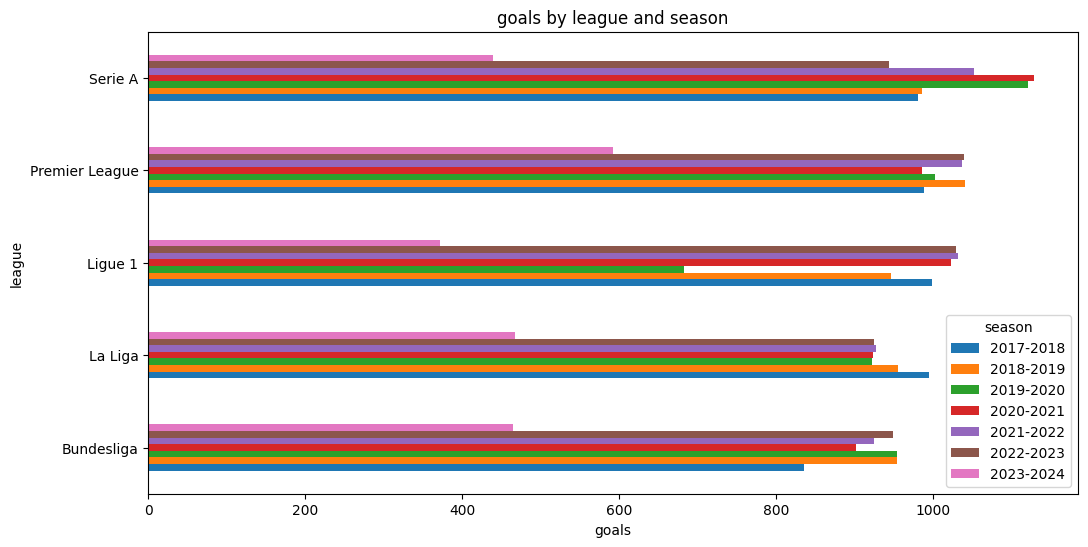

In [17]:
league_season_stats(df=df, stat='goals')

<Axes: title={'center': 'assists by league and season'}, xlabel='goals', ylabel='league'>

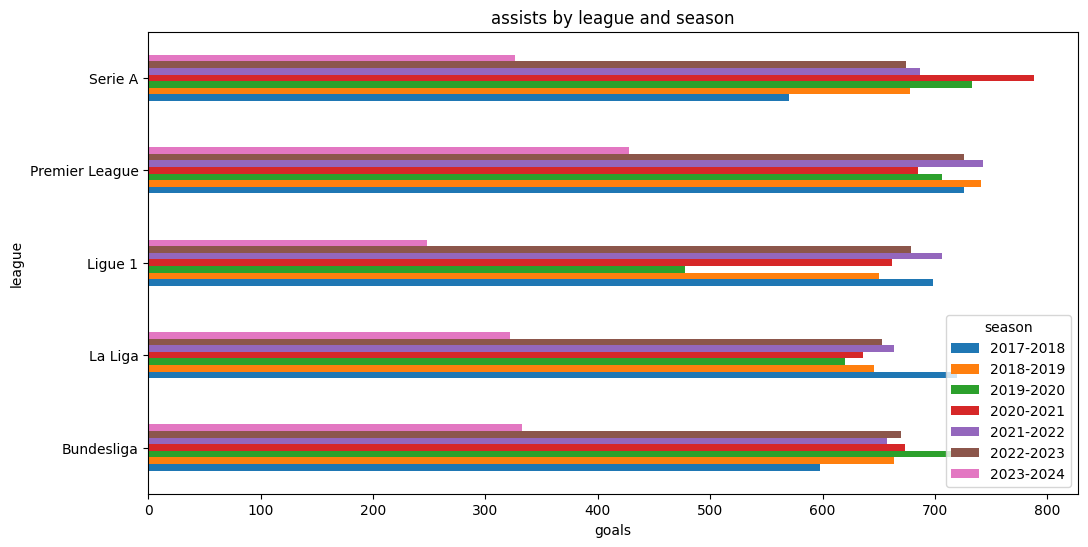

In [18]:
league_season_stats(df=df, stat='assists')

<Axes: title={'center': 'goals_assists by league and season'}, xlabel='goals', ylabel='league'>

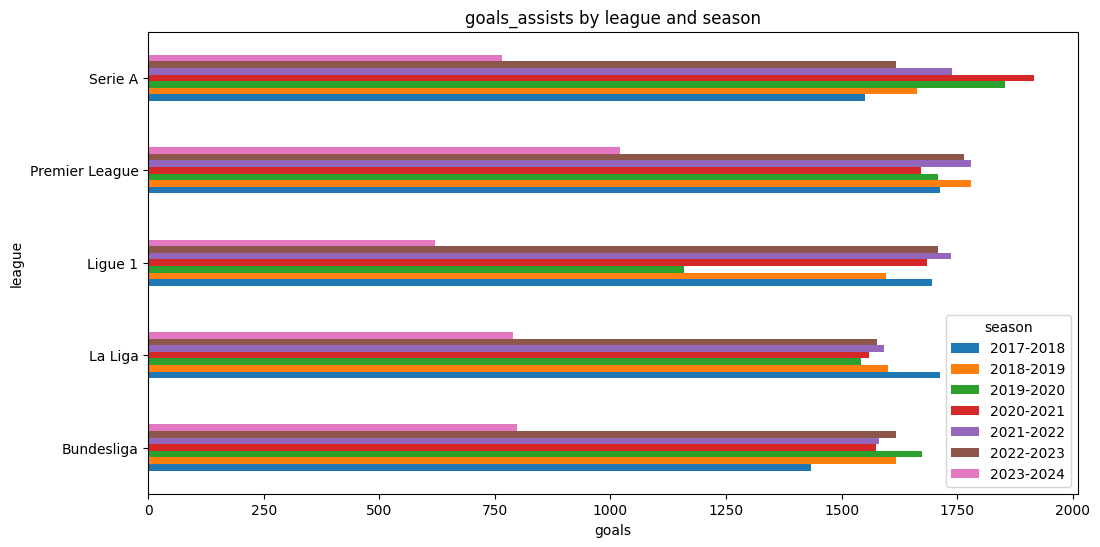

In [19]:
league_season_stats(df=df, stat='goals_assists')

<Axes: title={'center': 'penalty_kicks_attempted by league and season'}, xlabel='goals', ylabel='league'>

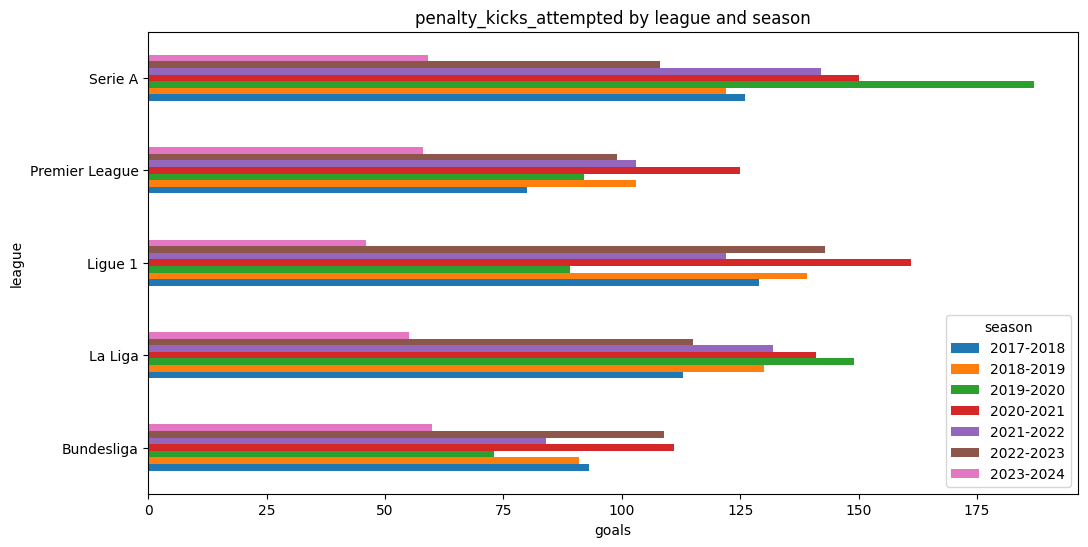

In [20]:
league_season_stats(df=df, stat='penalty_kicks_attempted')

## Nationality Analysis

## Position Analysis

In [21]:
# get distributions of stats by position
df['pos'].isnull().sum()  

3

In [22]:
# create new general position column
def get_general_position(pos: str) -> str:
    if isinstance(pos, float):
        return "Unknown"
    if pos.startswith("D"):
        position = "Defender"
    elif pos.startswith("M"):
        position = "Midfielder"
    elif pos.startswith("F"):
        position = "Forward"
    elif pos.startswith("G"):
        position = "Goalkeeper"
    else:
        position = "Unknown"
    return position

df["general_pos"] = df["pos"].apply(get_general_position)

In [23]:
df["general_pos"].value_counts()


general_pos
Defender      6746
Midfielder    6262
Forward       4714
Goalkeeper    1397
Unknown          3
Name: count, dtype: int64

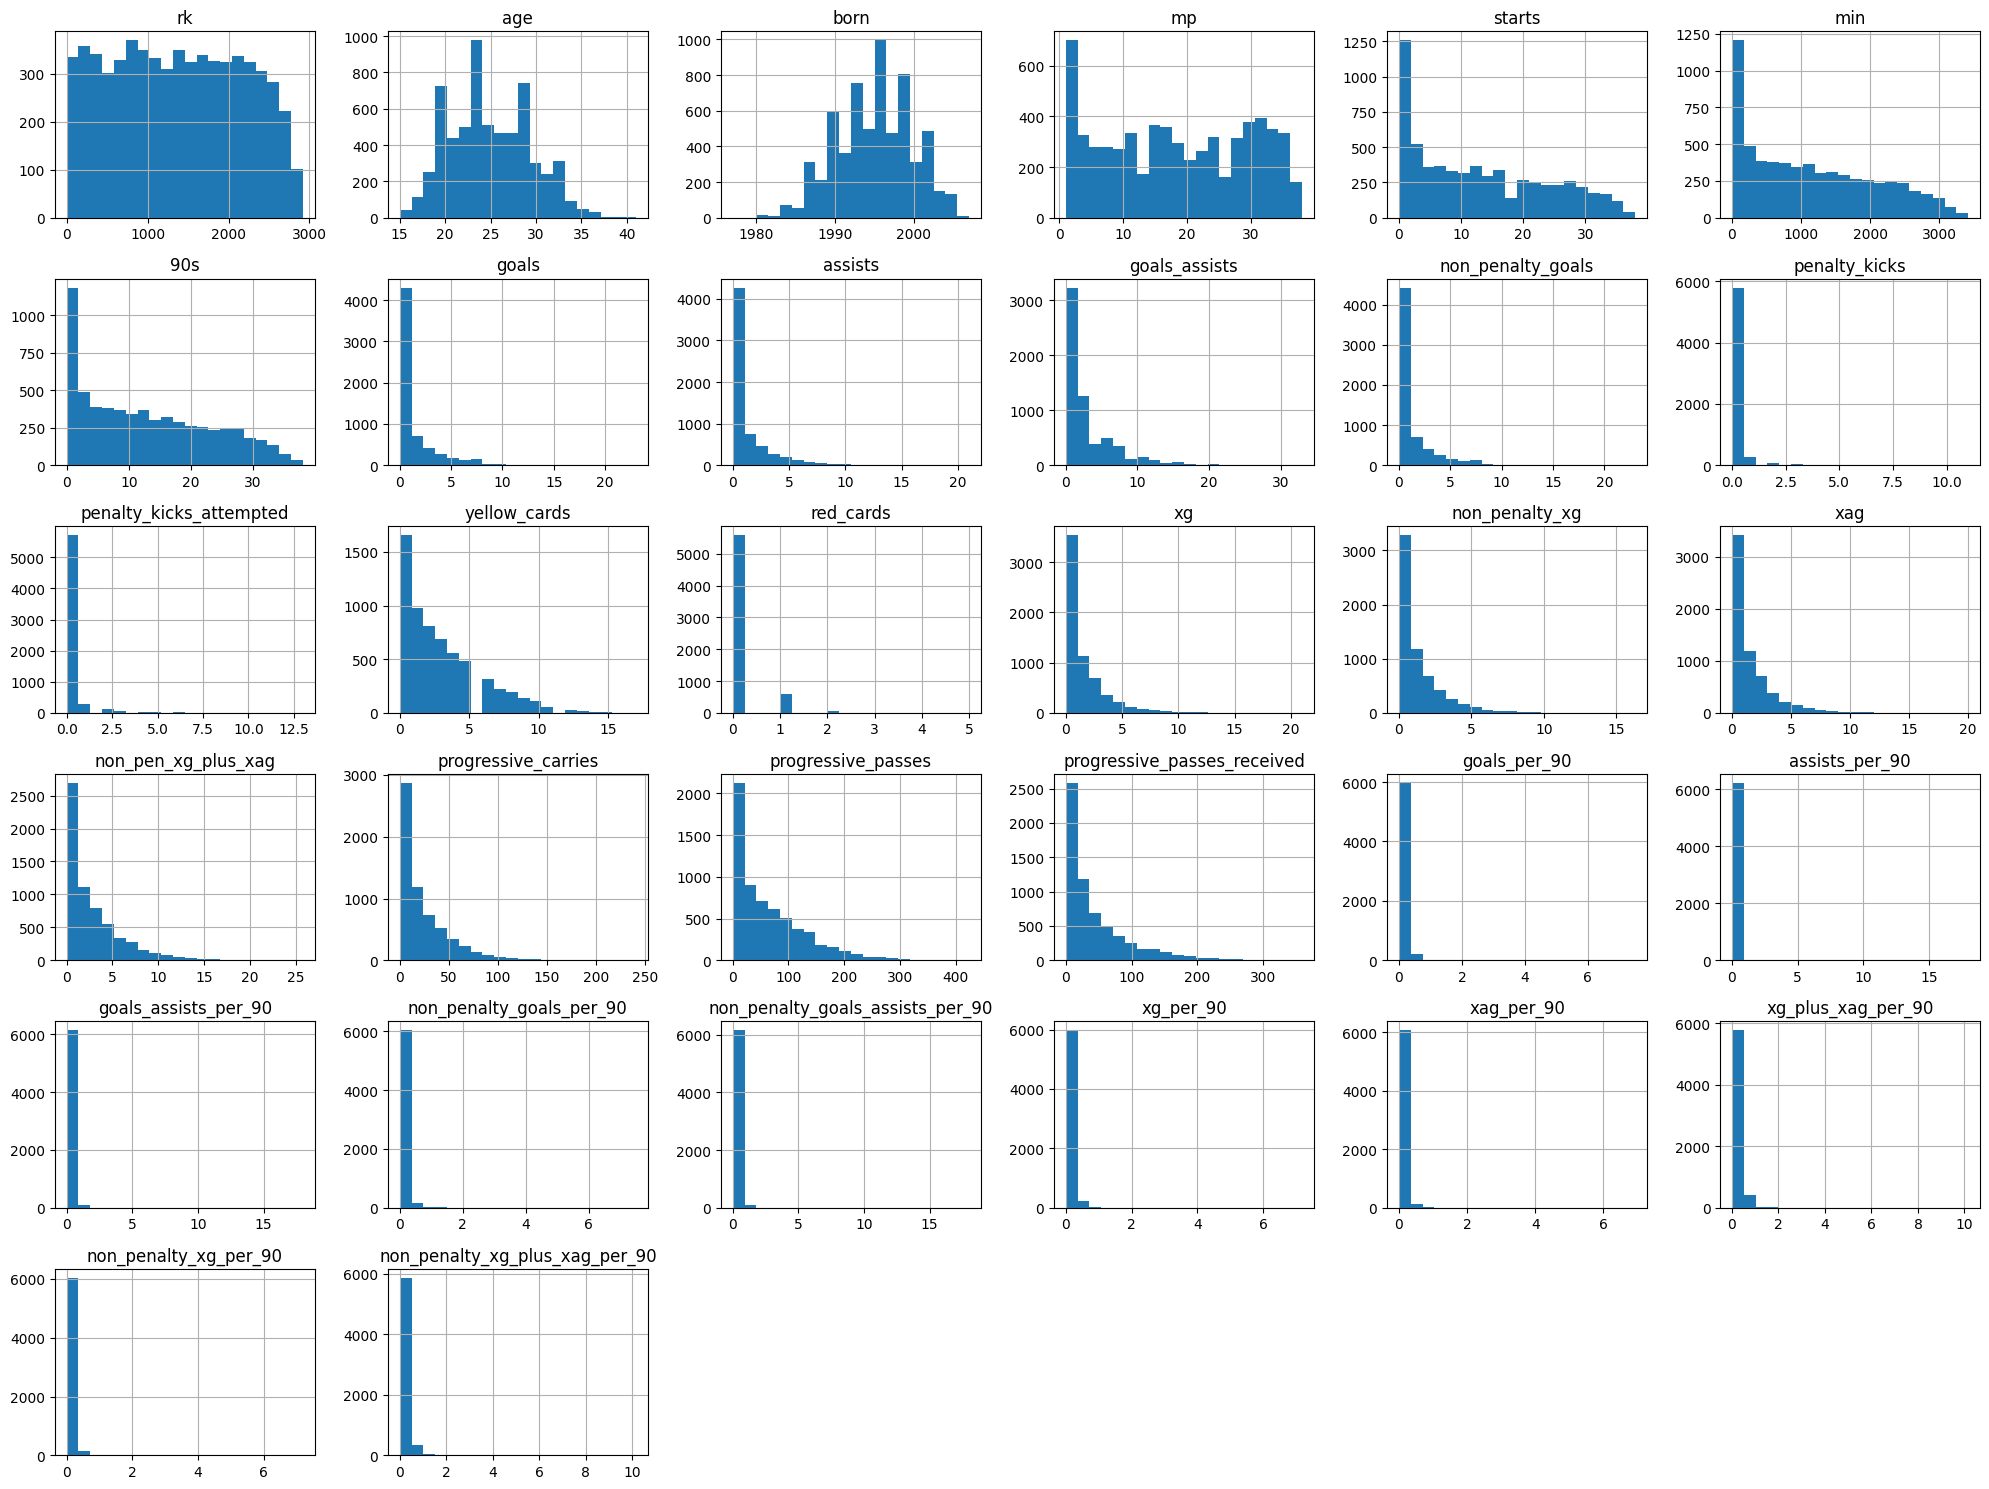

In [24]:
df.loc[df["general_pos"] == "Midfielder"].hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

In [25]:
positions = df["general_pos"].unique().tolist()[:-1]

In [26]:
# striker expected stats analysis
df_striker = df[df["general_pos"] == "Forward"]
expected_stats = (
    df.columns.tolist()[1:7]
    + [col for col in df_striker.columns if "x" in col and "per_90" not in col]
    + ["season"]
)

In [27]:
dff_striker = df_striker[expected_stats].reset_index(drop=True)
dff_striker.head()

,player,nation,pos,squad,comp,age,xg,non_penalty_xg,xag,non_pen_xg_plus_xag,season
0,Tammy Abraham,ENG,FW,Swansea City,Premier League,19.0,6.8,6.8,1.6,8.4,2017-2018
1,Yacine Adli,FRA,FW,Paris S-G,Ligue 1,17.0,0.0,0.0,0.0,0.0,2017-2018
2,Aritz Aduriz,ESP,FW,Athletic Club,La Liga,36.0,11.1,7.6,1.5,9.0,2017-2018
3,Benik Afobe,COD,FW,Bournemouth,Premier League,24.0,1.6,1.6,0.1,1.8,2017-2018
4,Imanol Agirretxe,ESP,FW,Real Sociedad,La Liga,30.0,1.2,1.2,0.0,1.2,2017-2018


In [28]:
# averages by season
def avg_by_season(df: pd.DataFrame, stat: str):
    return df.pivot_table(
        index="season", columns="comp", values=stat, aggfunc="mean"
    ).plot(
        kind="line",
        figsize=(12, 6),
        title=f"Average {stat} league by season",
        xlabel="season",
        ylabel=stat,
    )

<Axes: title={'center': 'Average xg league by season'}, xlabel='season', ylabel='xg'>

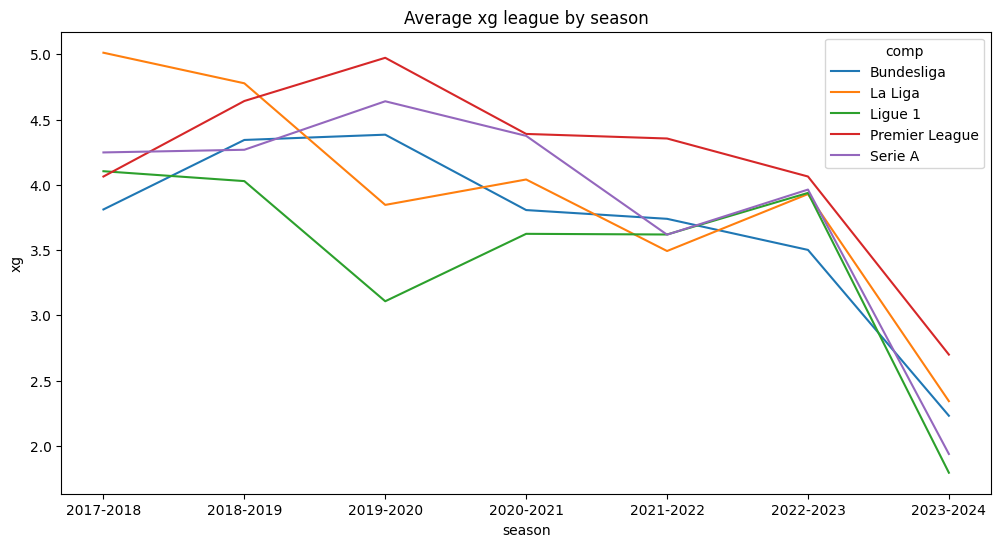

In [29]:
avg_by_season(df=dff_striker, stat="xg")

<Axes: title={'center': 'Average non_penalty_xg league by season'}, xlabel='season', ylabel='non_penalty_xg'>

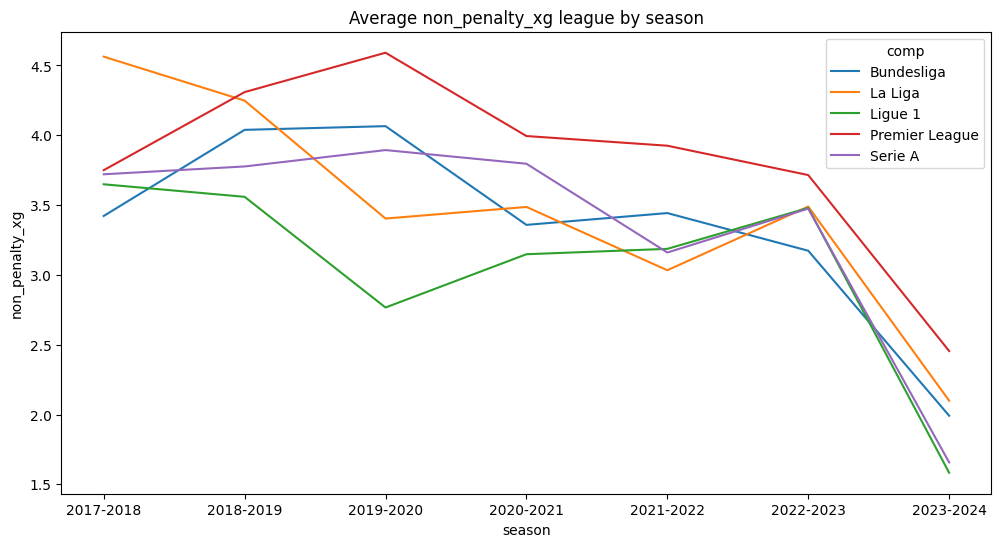

In [30]:
avg_by_season(df=dff_striker, stat="non_penalty_xg")

In [31]:
id_vars = dff_striker.columns.tolist()[:6] + ['season']

striker_melt = dff_striker.melt(id_vars=id_vars, var_name="stat", value_name="value")

In [32]:
st_melt_2 = striker_melt.groupby(['comp', 'season', 'stat'])['value'].mean().reset_index()
st_melt_2

,comp,season,stat,value
0,Bundesliga,2017-2018,non_pen_xg_plus_xag,5.109016
1,Bundesliga,2017-2018,non_penalty_xg,3.422131
2,Bundesliga,2017-2018,xag,1.695082
3,Bundesliga,2017-2018,xg,3.811475
4,Bundesliga,2018-2019,non_pen_xg_plus_xag,6.077966
...,...,...,...,...
135,Serie A,2022-2023,xg,3.963780
136,Serie A,2023-2024,non_pen_xg_plus_xag,2.511538
137,Serie A,2023-2024,non_penalty_xg,1.656923
138,Serie A,2023-2024,xag,0.855385


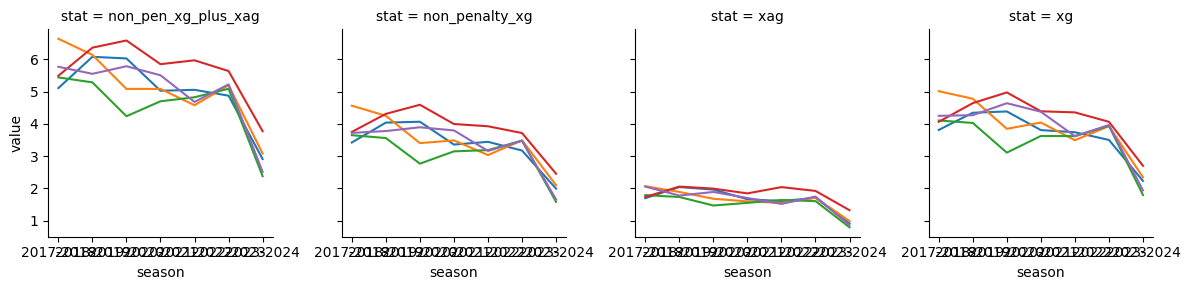

In [33]:
g = sns.FacetGrid(st_melt_2, col="stat", hue='comp', col_wrap=4)
g.map(sns.lineplot, 'season', 'value')

In [34]:
dff = dff_striker.groupby(['comp', 'season'])['age'].mean().reset_index()

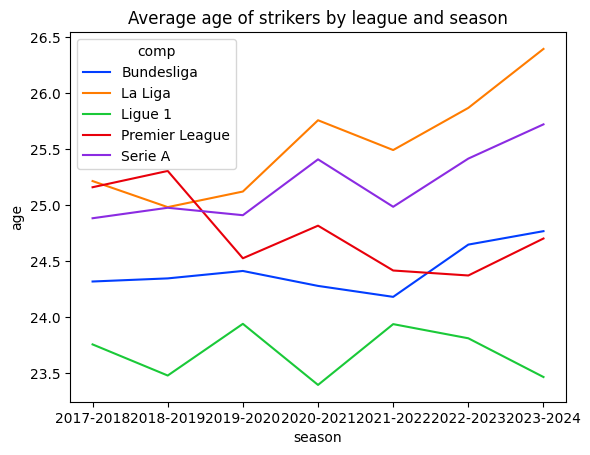

In [35]:
sns.lineplot(data=dff, x='season', y='age', hue='comp', palette='bright')
plt.title('Average age of strikers by league and season')
plt.show()

In [36]:
dff_striker

,player,nation,pos,squad,comp,age,xg,non_penalty_xg,xag,non_pen_xg_plus_xag,season
0,Tammy Abraham,ENG,FW,Swansea City,Premier League,19.0,6.8,6.8,1.6,8.4,2017-2018
1,Yacine Adli,FRA,FW,Paris S-G,Ligue 1,17.0,0.0,0.0,0.0,0.0,2017-2018
2,Aritz Aduriz,ESP,FW,Athletic Club,La Liga,36.0,11.1,7.6,1.5,9.0,2017-2018
3,Benik Afobe,COD,FW,Bournemouth,Premier League,24.0,1.6,1.6,0.1,1.8,2017-2018
4,Imanol Agirretxe,ESP,FW,Real Sociedad,La Liga,30.0,1.2,1.2,0.0,1.2,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...
4709,Edon Zhegrova,KVX,FW,Lille,Ligue 1,24.0,3.1,3.1,4.1,7.2,2023-2024
4710,Joshua Zirkzee,NED,FW,Bologna,Serie A,22.0,4.8,4.0,2.5,6.5,2023-2024
4711,Zito,ANG,"FW,MF",Cagliari,Serie A,21.0,2.1,2.1,2.1,4.3,2023-2024
4712,Simon Zoller,GER,"FW,MF",Bochum,Bundesliga,32.0,0.0,0.0,0.0,0.0,2023-2024


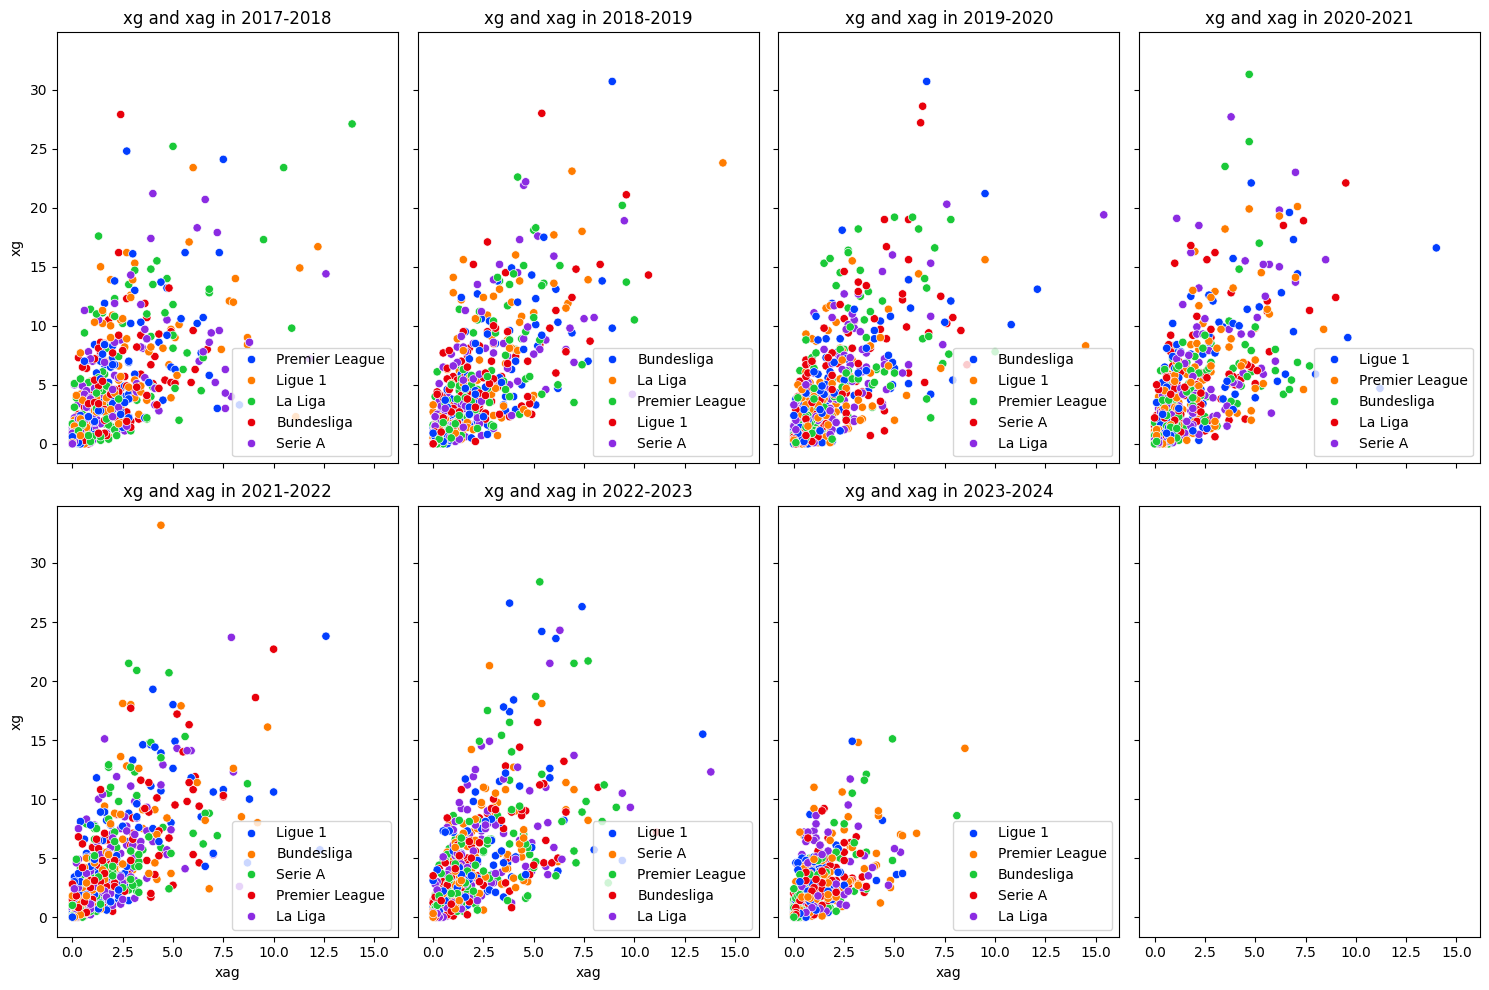

In [37]:
seasons = dff_striker['season'].unique().tolist()
fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharex=True, sharey=True)


# relationship between age and goals
for season, ax in zip(seasons, axes.flatten()):
    dff = dff_striker[dff_striker['season'] == season]
    
    sns.scatterplot(data=dff, x='xag', y='xg', hue='comp', palette='bright', ax=ax)
    ax.set_title(f'xg and xag in {season}')
    ax.legend(loc= 'lower right')

plt.tight_layout()
plt.show()
# sns.scatterplot(data=dff_striker, x='xag', y='xg', hue='comp', legend='brief')